# Predict Laptop Price - IE224 Nhóm 10

## Import Thư viện

In [570]:
import numpy as np
import pandas as pd
# from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Nếu sử dụng colab thì install câu lệnh bên dưới
#!pip install hvplot
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

## Thông tin cơ bản về  bộ dữ liệu

In [571]:
df = pd.read_csv('dataset_laptop.csv')

In [572]:
df.head(5)

,Unnamed: 0,company,typeName,cpu,processor,os,screen_size,ram,card,ssd,hdd,hard_driver,made_in,warranty,condition,price
0,0,HP,Pavilion,Intel,Core i5,Windows,13.6,8.0,Onboard,1,0,256.0,Việt Nam,3 tháng,Đã sử dụng,7900000
1,1,HP,Elitebook,Intel,Core i5,Windows,13.0,8.0,Onboard,1,0,256.0,Mỹ,3 tháng,Đã sử dụng,4900000
2,2,Dell,Latitude,Intel,Core i5,Windows,13.0,8.0,NVIDIA,0,1,256.0,NaN,1 tháng,Đã sử dụng,5300000
3,3,Apple,MacBook Air M2,Khác,NaN,iOS,13.0,16.0,Onboard,1,0,256.0,Việt Nam,4-6 tháng,Đã sử dụng,27500000
4,4,Dell,Latitude,Intel,Core i7,Windows,12.5,8.0,Onboard,1,0,256.0,NaN,Còn bảo hành,Đã sử dụng,5500000


In [573]:
df = df.drop('Unnamed: 0', axis=1)

In [574]:
df.shape

(130, 15)

- Bộ dữ liệu bao gồm 130 dòng và 15 cột dữ liệu

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      130 non-null    object 
 1   typeName     130 non-null    object 
 2   cpu          116 non-null    object 
 3   processor    106 non-null    object 
 4   os           130 non-null    object 
 5   screen_size  111 non-null    float64
 6   ram          115 non-null    float64
 7   card         111 non-null    object 
 8   ssd          130 non-null    int64  
 9   hdd          130 non-null    int64  
 10  hard_driver  116 non-null    float64
 11  made_in      72 non-null     object 
 12  warranty     130 non-null    object 
 13  condition    130 non-null    object 
 14  price        130 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 15.4+ KB


In [576]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    print("Cột {} có: {} dữ liệu khuyết".format(col, missing_data))

Cột company có: 0 dữ liệu khuyết
Cột typeName có: 0 dữ liệu khuyết
Cột cpu có: 14 dữ liệu khuyết
Cột processor có: 24 dữ liệu khuyết
Cột os có: 0 dữ liệu khuyết
Cột screen_size có: 19 dữ liệu khuyết
Cột ram có: 15 dữ liệu khuyết
Cột card có: 19 dữ liệu khuyết
Cột ssd có: 0 dữ liệu khuyết
Cột hdd có: 0 dữ liệu khuyết
Cột hard_driver có: 14 dữ liệu khuyết
Cột made_in có: 58 dữ liệu khuyết
Cột warranty có: 0 dữ liệu khuyết
Cột condition có: 0 dữ liệu khuyết
Cột price có: 0 dữ liệu khuyết


- Số lượng các giá trị khuyết ở trên là các giá trị np.nan

In [577]:
# Kiểm tra các dòng trùng nhau
df.duplicated().sum()

6

- Có 6 dòng dữ liệu trùng nhau

In [578]:
# Thực hiện loại bỏ các dòng trùng nhau
df = df.drop_duplicates()

# 1. Định dạng và làm sạch bộ dữ liệu (Data Cleaning)

In [579]:
df.head()

,company,typeName,cpu,processor,os,screen_size,ram,card,ssd,hdd,hard_driver,made_in,warranty,condition,price
0,HP,Pavilion,Intel,Core i5,Windows,13.6,8.0,Onboard,1,0,256.0,Việt Nam,3 tháng,Đã sử dụng,7900000
1,HP,Elitebook,Intel,Core i5,Windows,13.0,8.0,Onboard,1,0,256.0,Mỹ,3 tháng,Đã sử dụng,4900000
2,Dell,Latitude,Intel,Core i5,Windows,13.0,8.0,NVIDIA,0,1,256.0,NaN,1 tháng,Đã sử dụng,5300000
3,Apple,MacBook Air M2,Khác,NaN,iOS,13.0,16.0,Onboard,1,0,256.0,Việt Nam,4-6 tháng,Đã sử dụng,27500000
4,Dell,Latitude,Intel,Core i7,Windows,12.5,8.0,Onboard,1,0,256.0,NaN,Còn bảo hành,Đã sử dụng,5500000


## Định dạng dữ liệu

### Thay các giá trị "Khác" trong cột "cpu" và "card" thành np.nan

In [580]:
# Dùng phương thức replace để thay giá trị "Khác" => np.nan
df["cpu"].replace(to_replace="Khác", value=np.nan, inplace = True)
df["card"].replace(to_replace="Khác", value=np.nan, inplace = True)

### Các giá trị "AMD" không thuộc trường "card" => thay bằng np.nan 

In [581]:
df["card"].replace(to_replace="AMD", value=np.nan, inplace = True)

### Thay các giá trị 250, 500 trong cột "hard_driver" => 256, 512 để hợp với thực tế hơn

In [582]:
# Replace values column hard_driver(GB): 250 -> 256, 500-> 512
df["hard_driver"].replace(to_replace=250, value=256, inplace = True)
df["hard_driver"].replace(to_replace=500, value=512, inplace = True)

### Đổi tên các giá trị iOS trong cột "os" => MacOS

In [583]:
df["os"].replace(to_replace="iOS", value="macOS", inplace=True)

### Chuẩn hóa dữ liệu cột made_in:
- Việt Nam => VietNam
- Mỹ       => US
- Nhật Bản => Japan
- Đài loan => Taiwan

In [584]:
df["made_in"].value_counts()

Mỹ          43
Việt Nam    25
Nhật Bản     1
Đài Loan     1
Name: made_in, dtype: int64

In [585]:
# thực hiện chuẩn hóa giá trị của cột made_in
df["made_in"].replace("Mỹ", "US", inplace=True)
df["made_in"].replace("Việt Nam", "VietNam", inplace=True)
df["made_in"].replace("Nhật Bản", "Japan", inplace=True)
df["made_in"].replace("Đài Loan", "Taiwan", inplace=True)

In [586]:
df.warranty.value_counts()

3 tháng          43
4-6 tháng        28
Bảo hành hãng    23
Còn bảo hành     18
1 tháng           4
7-12 tháng        4
Hết bảo hành      3
2 tháng           1
Name: warranty, dtype: int64

### Chuẩn hóa dữ liệu cột warranty
- Loại bỏ từ " tháng"
- Hết bảo hành => 0
- Bảo hành hãng, Còn bảo hành => np.nan để thực hiện thay bằng giá trị xuất hiện nhiều nhất

In [587]:
# Thực hiện chuẩn hóa dữ liệu cột warranty
df['warranty'] = df['warranty'].str.replace(' tháng', '')
df.replace("Còn bảo hành", np.nan, inplace=True)
df.replace("Bảo hành hãng", np.nan, inplace=True)
df.replace("Hết bảo hành", "0", inplace=True)

### Làm sạch dữ liệu

#### Import thư viện sklearn để thực hiện điền các giá trị khuyết

In [588]:
from sklearn.impute import SimpleImputer

#### Thực hiện điều các giá trị khuyết trong các cột 'cpu','processor','card' bằng giá trị xuất hiện nhiều nhất (most_frequent)

In [589]:
categorical_cols = ['cpu','processor','card']
imputer_category = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df[categorical_cols] = imputer_category.fit_transform(df[categorical_cols])

#### Thực hiện điều các giá trị khuyết trong các cột 'screen_size', 'ram', 'hard_driver bằng giá trị trung bình (most_frequent)

In [590]:
# Replace nan = median()
numeric_cols = ['screen_size', 'ram', 'hard_driver']
imputer_num = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

### Điền các giá trị khuyết trong cột made_in thành không rõ nguồn gốc (Unknown)

In [591]:
# Replace values column made_in: Nan => unknown
df["made_in"].replace(to_replace=np.nan, value="Unknown", inplace=True)

### Đều là laptop cũ nên các giá trị của cột condition sẽ ảnh hưởng tới giá như nhau => loại bỏ (drop)

In [592]:
# Thực hiện xóa cột condition
df.drop("condition", axis=1, inplace=True)

### Điền giá trị khuyết cho cột warranty
- 4-6  => 6
- 7-12 => 12
- Điều giá trị xuất hiện nhiều nhất cho các giá trị khuyết

In [593]:
# Thực hiện thay thế số cụ thể cho các giá trị trong khoảng
df["warranty"].replace("4-6", "6", inplace=True)
df["warranty"].replace("7-12", "12", inplace=True)

# Thực hiện điền giá trị khuyết bằng giá trị xuất hiện nhiều nhất
categorical_col = ["warranty"]
imputer_warr = SimpleImputer(strategy='most_frequent')
df[categorical_col] = imputer_warr.fit_transform(df[categorical_col])

In [594]:
# Chuyển kiểu dữ liệu cho cột warranty
df['warranty'] = df['warranty'].astype(int)

### Gộp hai cột ssd và hdd => ssd/hdd
- Vì mỗi chiếc laptop sẽ có một trong hai loại
- ssd : 1
- hdd : 0

In [595]:
# Xóa cột hdd
df.drop(columns="hdd", inplace=True)
# Đổi tên cột ssd => ssd/hdd
df.rename(columns={"ssd":"ssd/hdd"}, inplace=True)

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 129
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      124 non-null    object 
 1   typeName     124 non-null    object 
 2   cpu          124 non-null    object 
 3   processor    124 non-null    object 
 4   os           124 non-null    object 
 5   screen_size  124 non-null    float64
 6   ram          124 non-null    float64
 7   card         124 non-null    object 
 8   ssd/hdd      124 non-null    int64  
 9   hard_driver  124 non-null    float64
 10  made_in      124 non-null    object 
 11  warranty     124 non-null    int32  
 12  price        124 non-null    int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 13.1+ KB


In [597]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# Q1, Q3

In [598]:
# IQR = Q3 - Q1

In [599]:
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR

In [600]:
# df = df[(df['price']>lower) & (df['price']<upper)]

# 2. Trực quan hóa dữ liệu EDA (Exploratory Data Analysis)

In [601]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\khanhduy\AppData\Local\Temp\ipykernel_17836\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

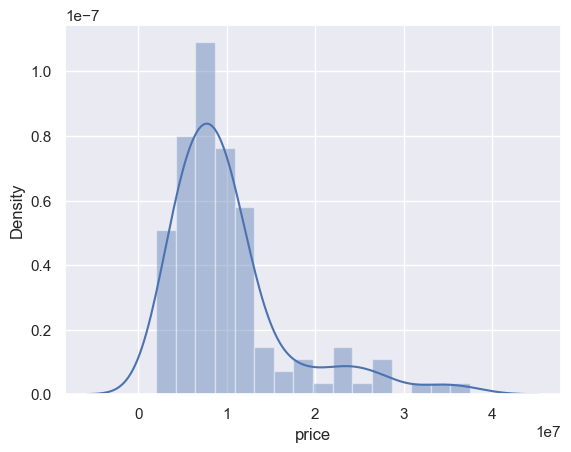

In [602]:
sns.distplot(df["price"])

#### Nhận xét:
- Giá tiền của những chiếc laptop chủ yếu nằm trong khoảng 3-13 triệu
- Cũng có một số chiếc laptop có giá nhỉnh hơn

### 'company', 'cpu', 'processor', 'ssd/hdd', 'os', 'card', 'made_in'

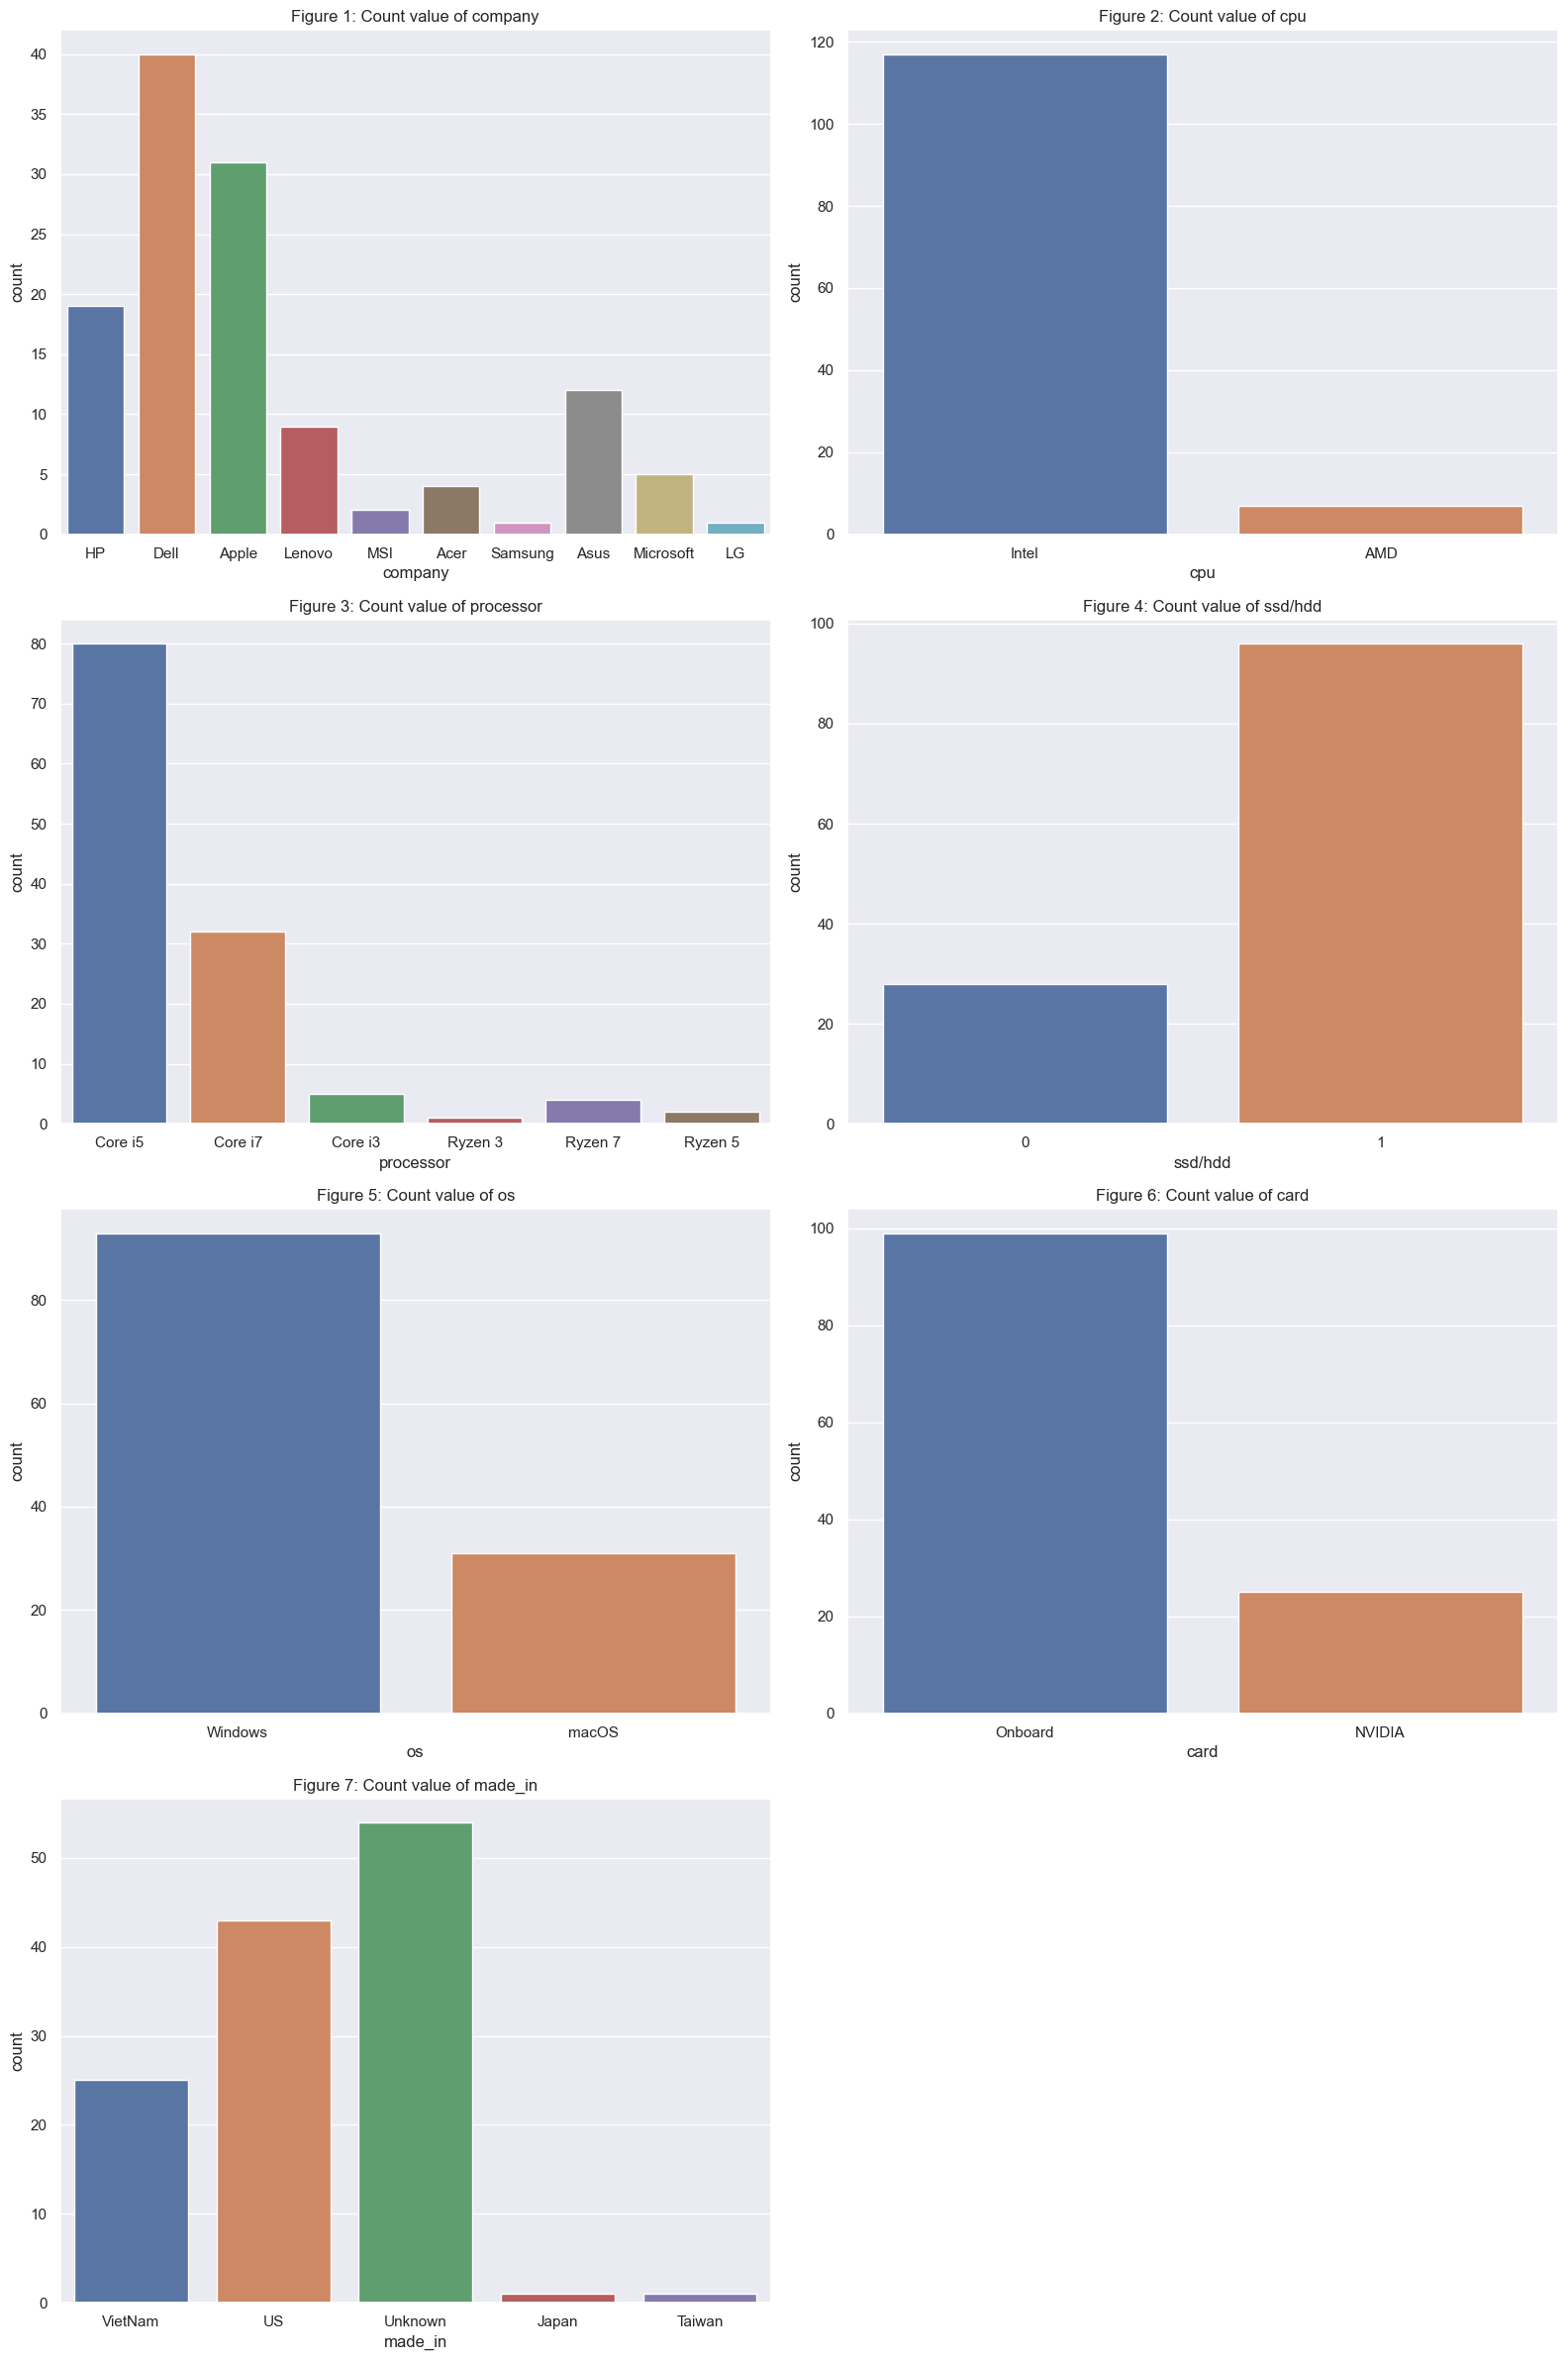

In [603]:
features_count_cate = ['company', 'cpu', 'processor','ssd/hdd', 'os', 'card', 'made_in']

n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*6))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_count_cate):
            ax_i = ax[r, c]
            sns.countplot(data = df, x = features_count_cate[i], ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Count value of {features_count_cate[i]}')
ax.flat[-1].set_visible(False) # Xóa bảng cuối cùng
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

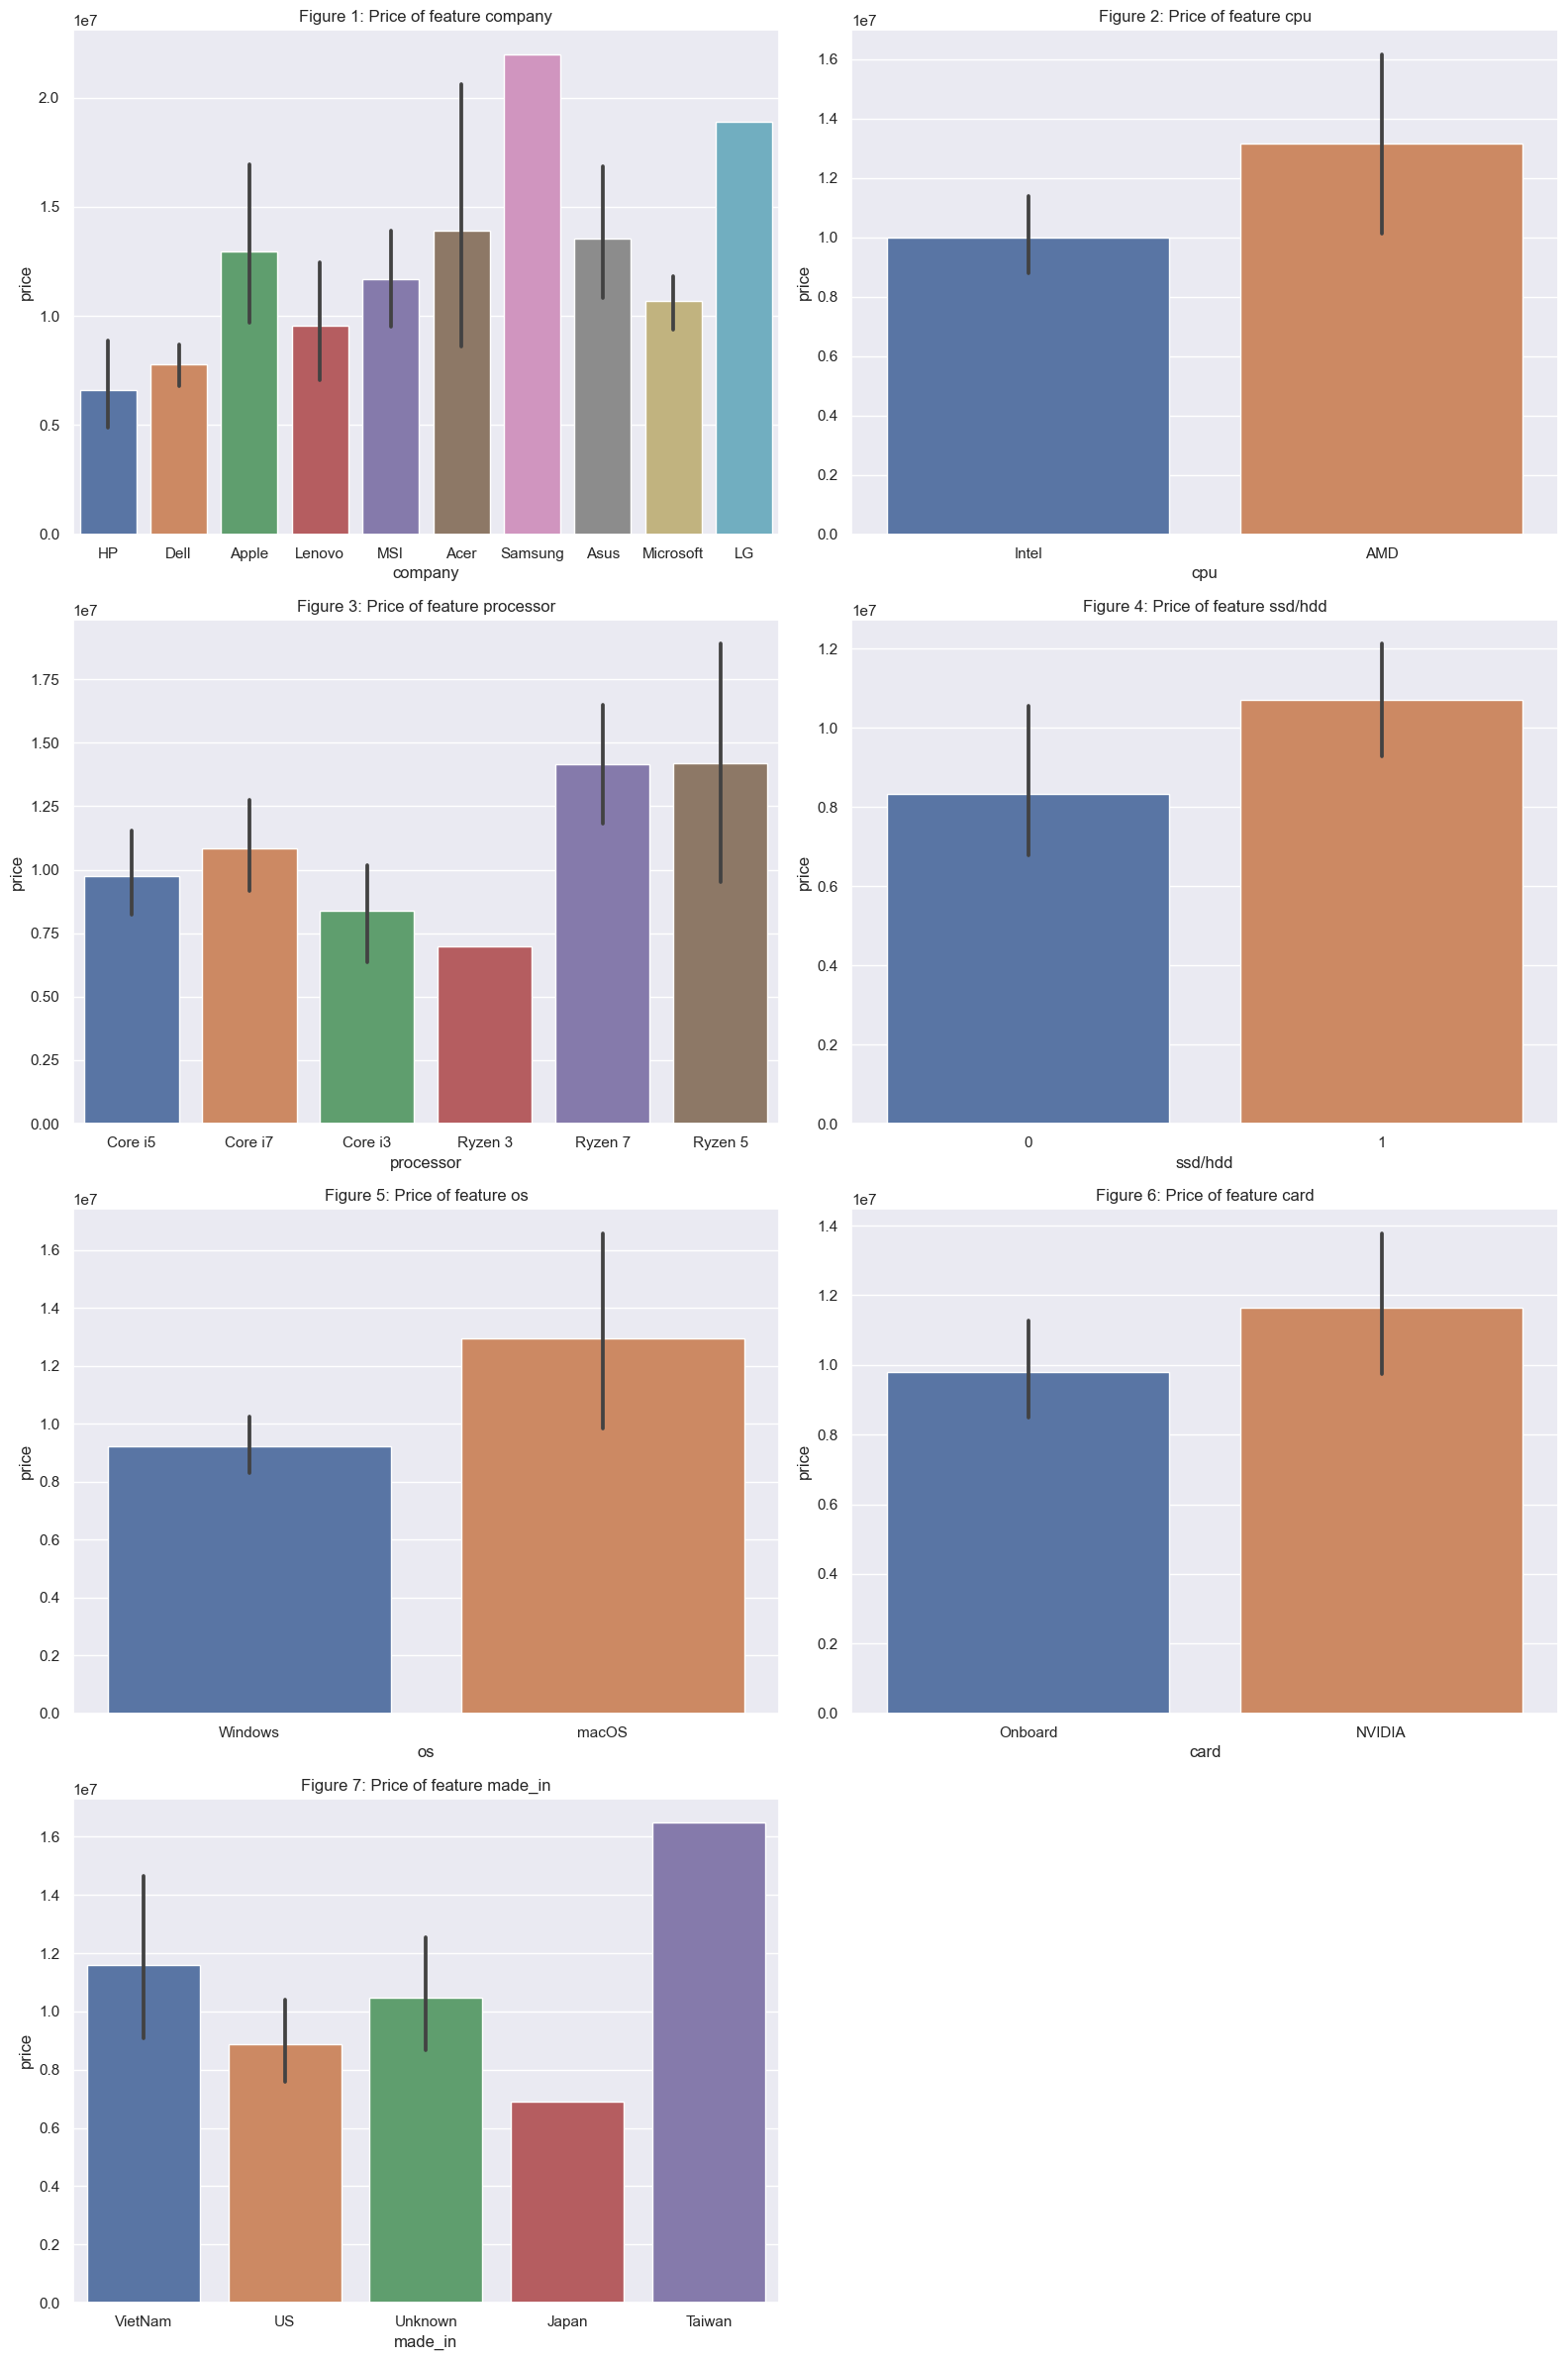

In [604]:
features_bar_cat = ['company', 'cpu', 'processor','ssd/hdd', 'os', 'card', 'made_in']

n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*6))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_bar_cat):
            ax_i = ax[r, c]
            sns.barplot(data = df, x = features_bar_cat[i], y = 'price', estimator=np.mean, ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Price of feature {features_bar_cat[i]}')
ax.flat[-1].set_visible(False) #Xóa bảng cuối cùng
plt.tight_layout()
plt.show

- company: Giá trung bình của laptop ở các công ty tập khoảng 6-13tr
- cpu   : Intel là phổ biến những giá trung bình thấp hơn của ADM
- processor: Giá trung bình của ryzen 5 và ryzen 7 sẽ nhỉnh hơn
- Các cột còn lại đa số là cân bằng về trung bình giá giữa các loại biến trong cột

### 'screen_size', 'ram',  'hard_driver', 'warranty'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

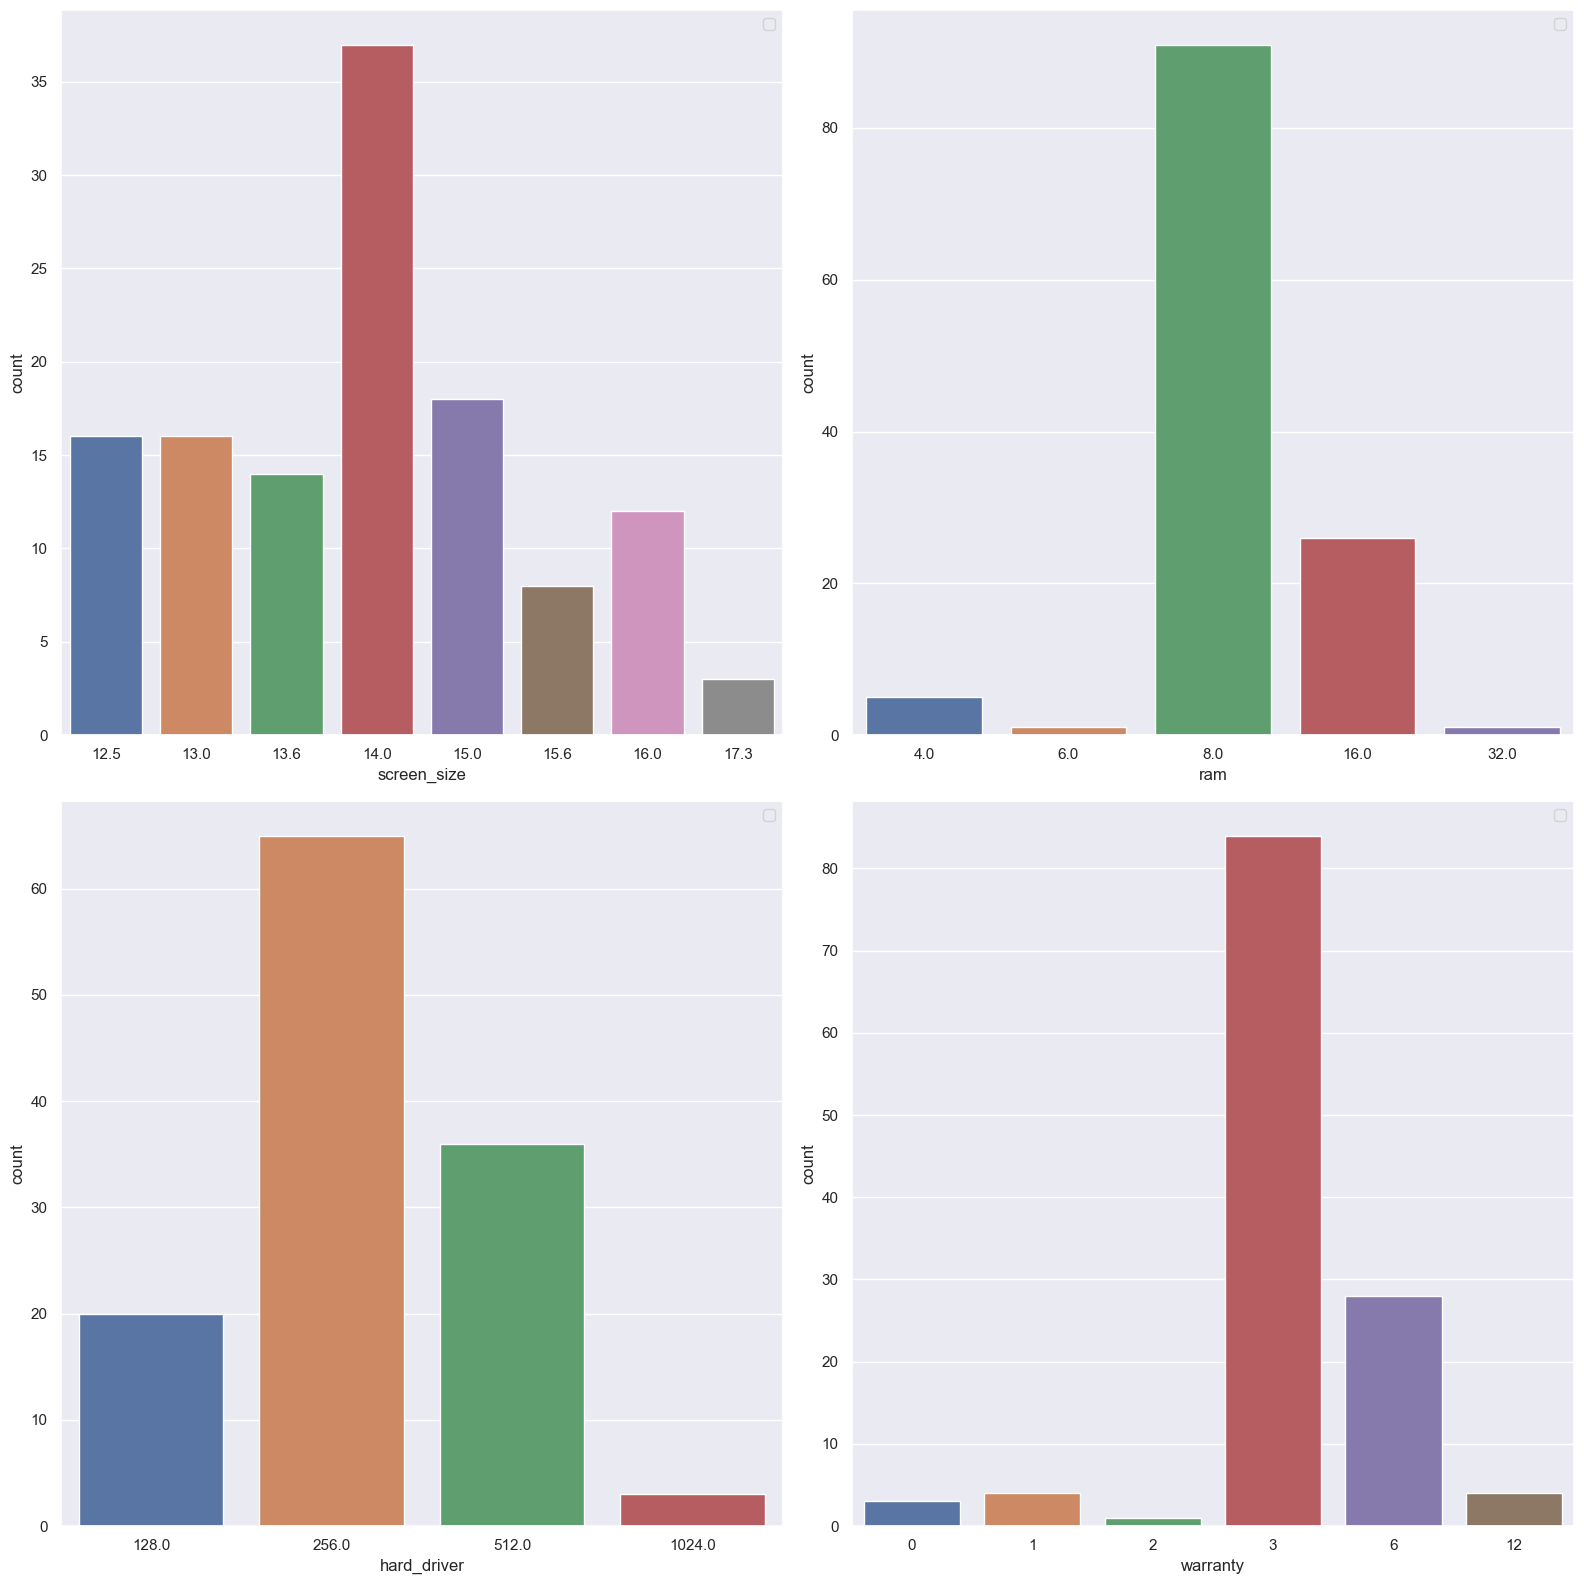

In [605]:
sns.set_theme()
features_dis_num = ['screen_size', 'ram', 'hard_driver', 'warranty']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_dis_num):
            ax_i = ax[r, c]            
            sns.countplot(data = df, x = features_dis_num[i], ax = ax_i)
            ax_i.legend(title = '', loc='upper right')
plt.tight_layout()
plt.show

- Số lượng các loại trong từng cột biến số

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

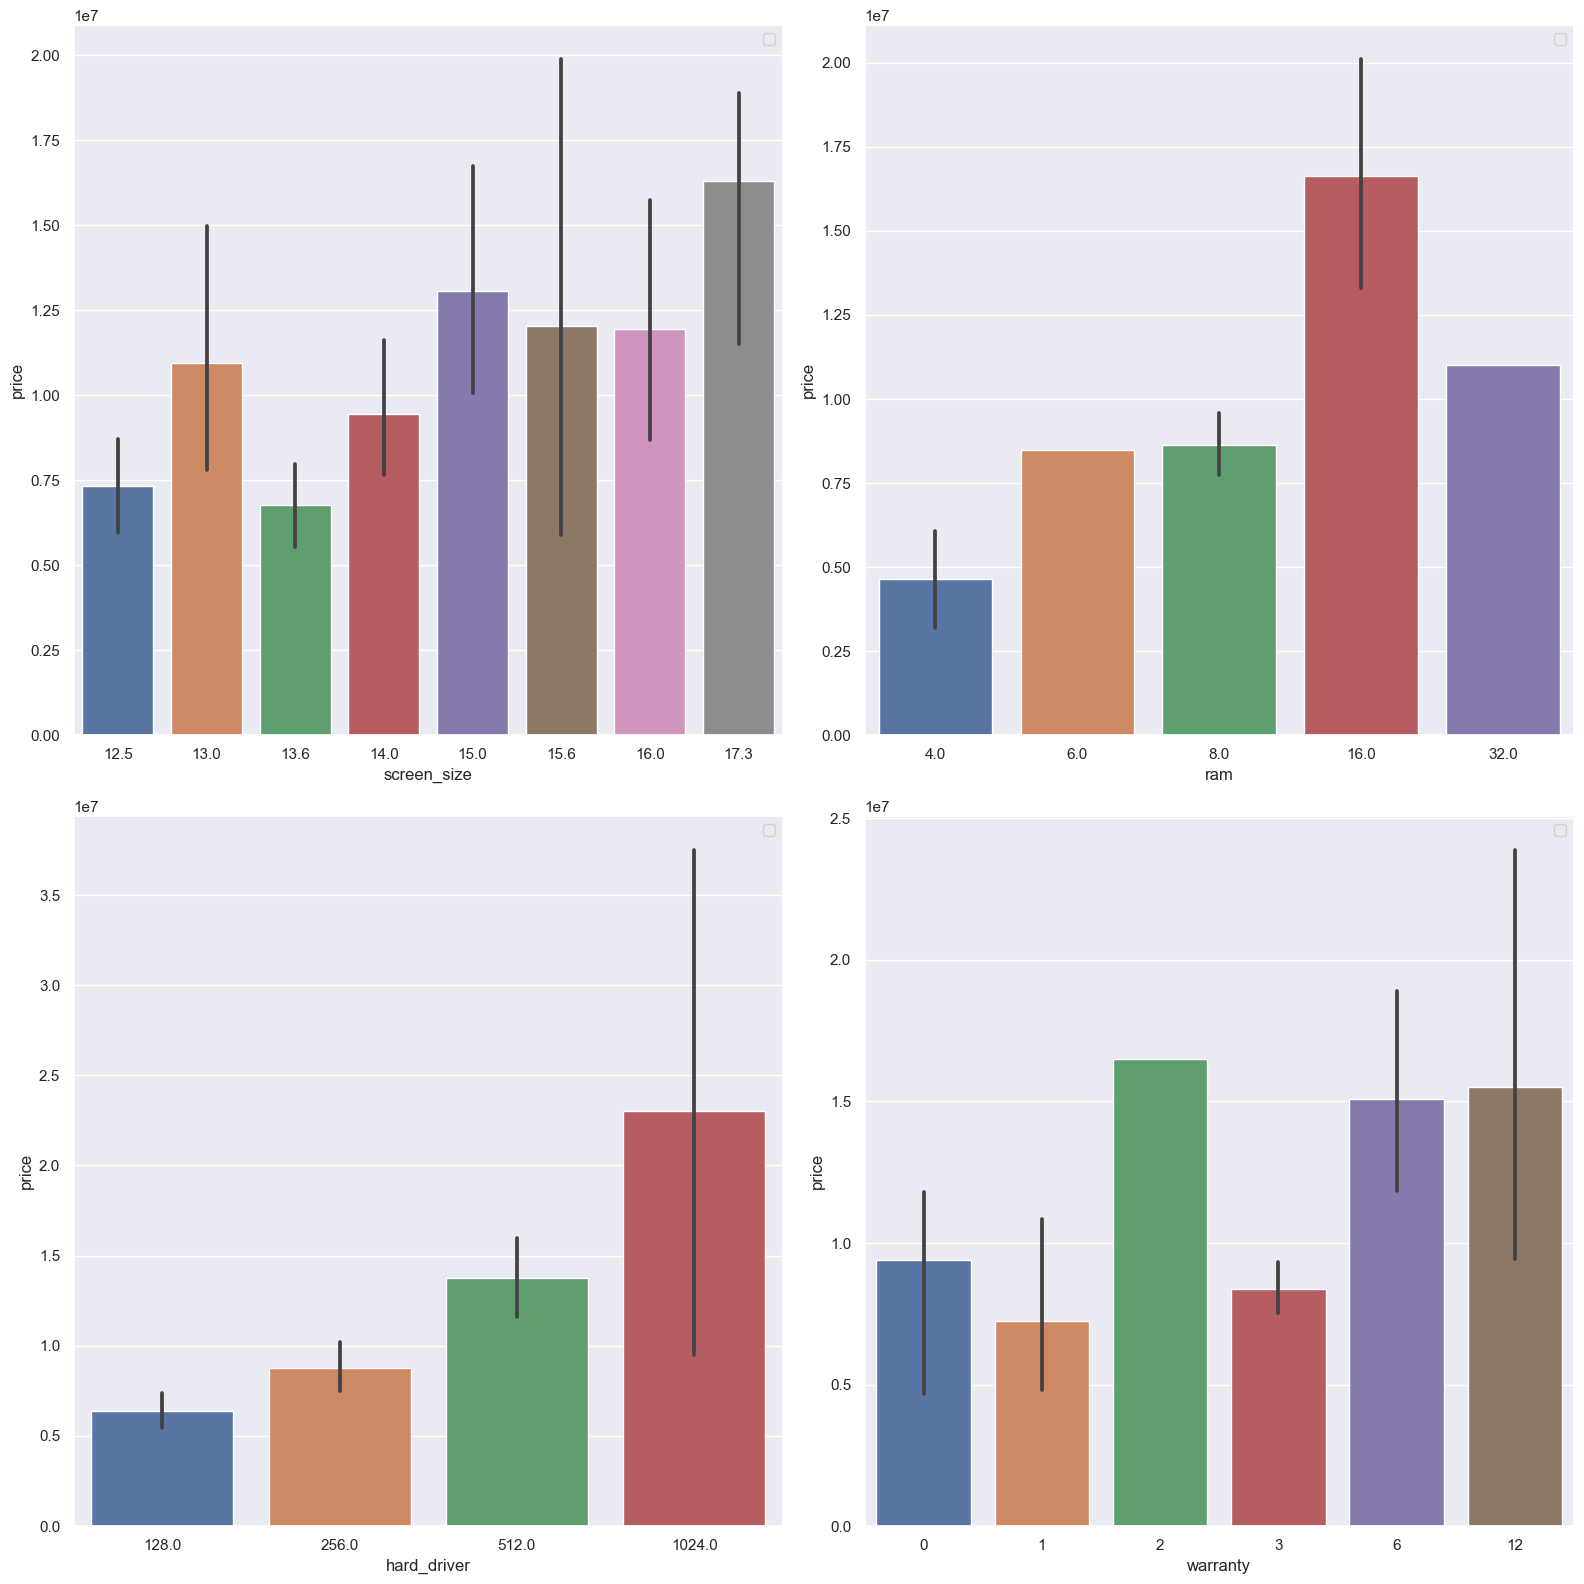

In [606]:
sns.set_theme()
features_bar_num = ['screen_size', 'ram', 'hard_driver', 'warranty']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_bar_num):
            ax_i = ax[r, c]            
            sns.barplot(data = df, x = features_bar_num[i], y = 'price', estimator=np.mean, ax = ax_i)
            ax_i.legend(title = '', loc='upper right')
plt.tight_layout()
plt.show

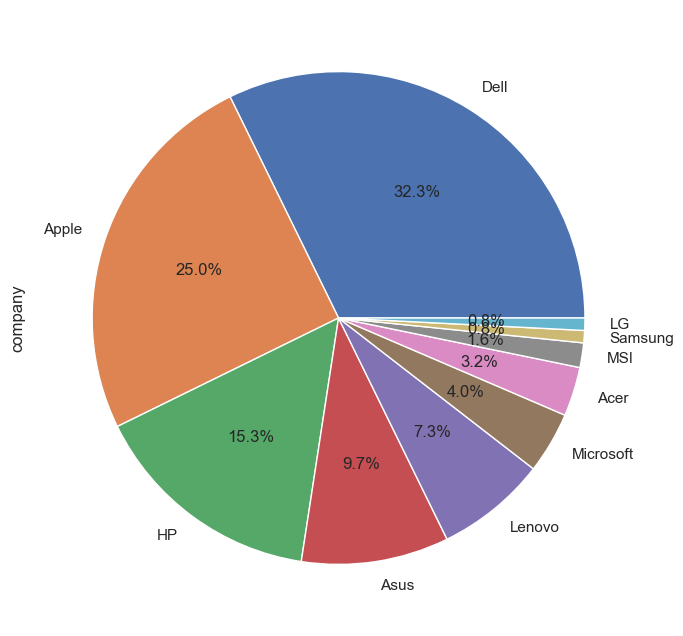

In [607]:
df_company = df["company"].value_counts()
df_company.plot(kind='pie',
                   figsize=(8,8),
                   autopct='%1.1f%%')
plt.show()

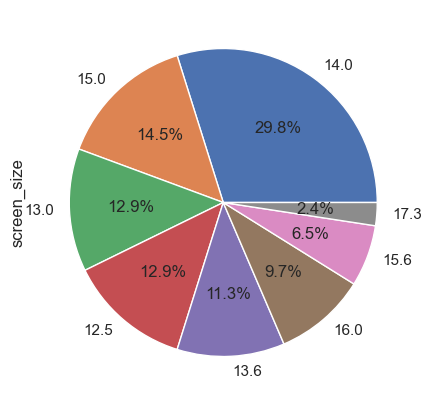

In [608]:
df_screen_size = df["screen_size"].value_counts()
df_screen_size.plot(kind='pie',
                   figsize=(5,5),
                   autopct='%1.1f%%')
plt.show()

In [609]:
df.head(3)

,company,typeName,cpu,processor,os,screen_size,ram,card,ssd/hdd,hard_driver,made_in,warranty,price
0,HP,Pavilion,Intel,Core i5,Windows,13.6,8.0,Onboard,1,256.0,VietNam,3,7900000
1,HP,Elitebook,Intel,Core i5,Windows,13.0,8.0,Onboard,1,256.0,US,3,4900000
2,Dell,Latitude,Intel,Core i5,Windows,13.0,8.0,NVIDIA,0,256.0,Unknown,1,5300000


In [610]:
df.describe()

,screen_size,ram,ssd/hdd,hard_driver,warranty,price
count,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02
mean,14.154032,9.693548,0.774194,328.258065,3.822581,1.016641e+07
std,1.177181,4.000361,0.419809,175.976157,2.087705,6.759851e+06
min,12.500000,4.000000,0.000000,128.000000,0.000000,2.000000e+06
25%,13.000000,8.000000,1.000000,256.000000,3.000000,5.800000e+06
50%,14.000000,8.000000,1.000000,256.000000,3.000000,8.495000e+06
75%,15.000000,8.000000,1.000000,512.000000,6.000000,1.141750e+07
max,17.300000,32.000000,1.000000,1024.000000,12.000000,3.750000e+07


### Độ tương quan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

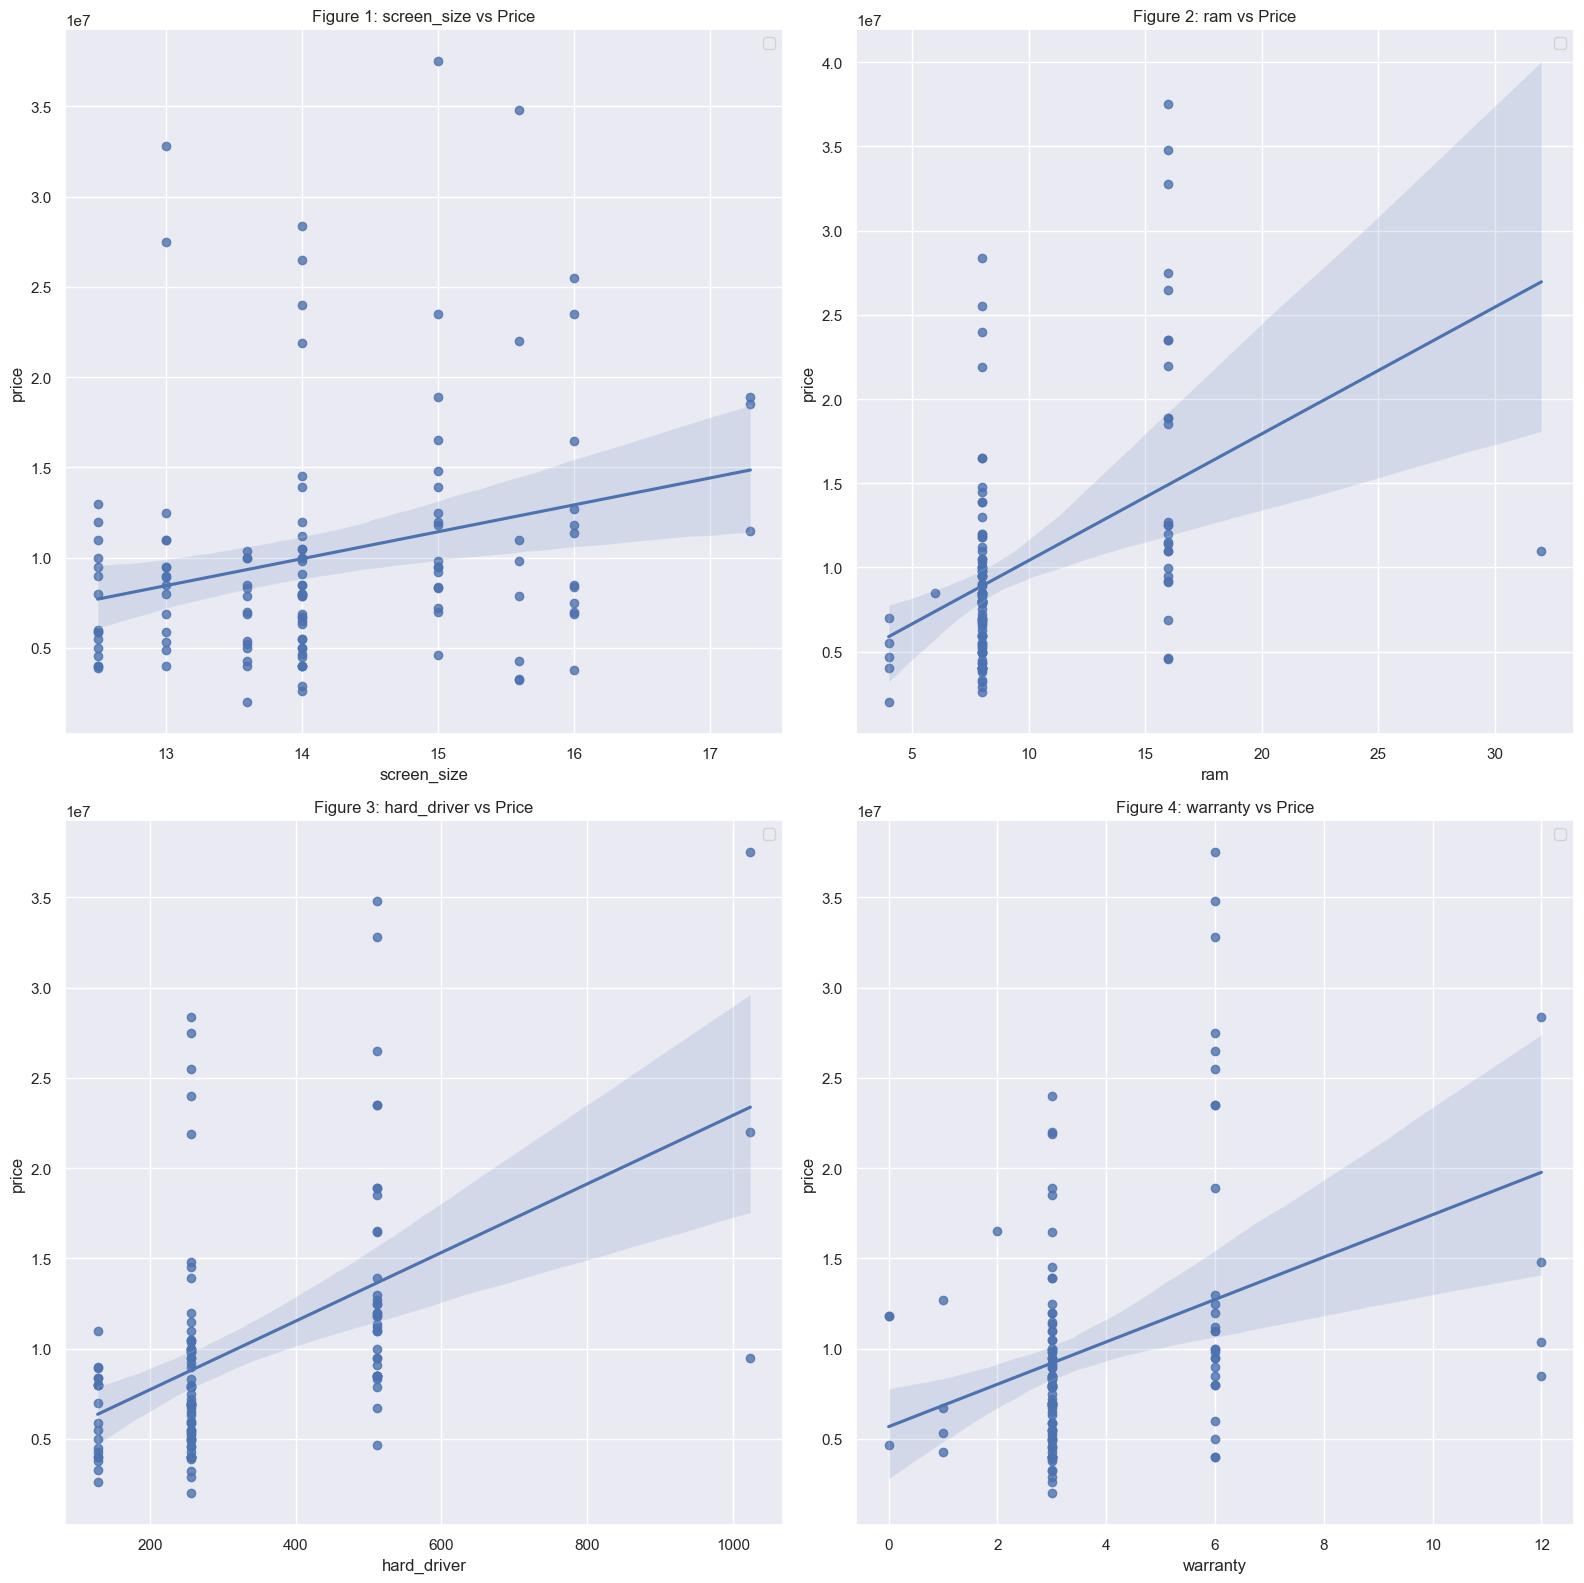

In [611]:
features_reg = ['screen_size', 'ram', 'hard_driver', 'warranty']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_reg):
            ax_i = ax[r, c]
            sns.regplot(data=df, x=features_reg[i], y="price", ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: {features_dis[i]} vs Price')
            ax_i.legend(title = '', loc='upper right')
plt.tight_layout()
plt.show

-  Tương quan mạnh giữa các biến với nhau

- Đồ thị boxplot giúp quan sát các giá tri median, IQR(khoảng tứ phân vị), MAX, MIN

C:\Users\khanhduy\AppData\Local\Temp\ipykernel_17836\3820300259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

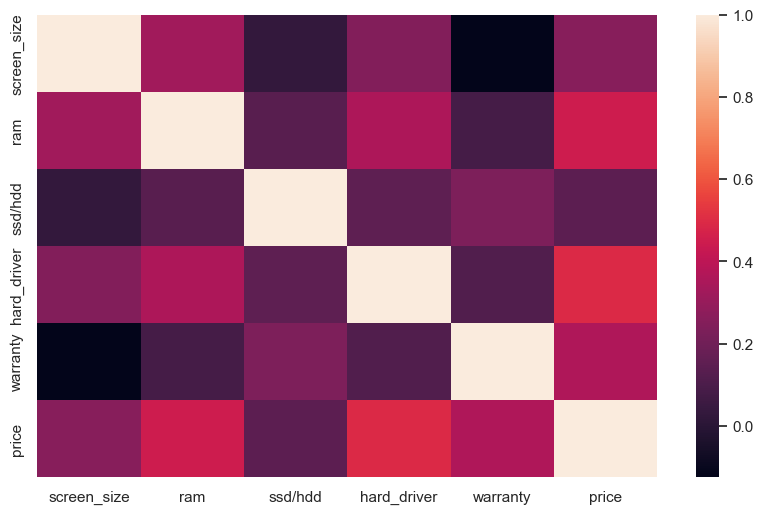

In [612]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

- Heatmap: thể hiện mối tương quan giữa 2 biến thông qua màu sắc

#  3. Training Model Machine Learning

## Khởi tạo bộ dữ liệu train, test

In [613]:
X = df.drop(columns={"price", "typeName"})
Y = df["price"]

In [614]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 42)

In [615]:
X_train.head(3)

,company,cpu,processor,os,screen_size,ram,card,ssd/hdd,hard_driver,made_in,warranty
119,Apple,Intel,Core i5,macOS,13.6,4.0,Onboard,1,128.0,Unknown,3
50,Asus,Intel,Core i7,Windows,16.0,16.0,NVIDIA,1,512.0,US,6
82,Dell,Intel,Core i7,Windows,13.0,8.0,Onboard,0,256.0,US,3


In [616]:
Y_train.head(3)

119     7000000
50     23500000
82      9500000
Name: price, dtype: int64

#### Define Tranformer -> Encoder var

In [617]:
# Create value num_feature and cat_feature
num_feature = ["screen_size", "ram", "hard_driver", "warranty"]
cat_feature = ["company", "cpu", "processor",'ssd/hdd', "os", "card", "made_in"]

In [618]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#define
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [619]:
#define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feature),
    ('cat', cat_transformer, cat_feature)
])

In [620]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['screen_size', 'ram', 'hard_driver',
                                  'warranty']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['company', 'cpu', 'processor', 'ssd/hdd',
                                  'os', 'card', 'made_in'])])

In [621]:
X = preprocessor.transform(X)

In [622]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## RandomForestRegressor

In [623]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state = 1)

In [624]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [625]:
df_random = pd.DataFrame({'y_test':Y_test.head(5), 'rf_test_predict':rf_model.predict(X_test[0:5])})
df_random

,y_test,rf_test_predict
18,14500000,1.531014e+07
45,9800000,6.361550e+06
39,11390000,1.276630e+07
80,12500000,1.058260e+07
56,18900000,1.997920e+07


### Import thư viện để thực hiện kiểm chứng chéo

In [626]:
from sklearn.model_selection import cross_val_score

## Tính r2 và MAE trung bình 

In [627]:
r2_score_rf = cross_val_score(RandomForestRegressor(random_state = 1), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_rf = abs(cross_val_score(RandomForestRegressor(random_state = 1), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_rf, meanAbs_rf

(0.36439303240060084, 3806605.8263310655)

### Tạo list lưu kết quả

In [628]:
r2_scores = []
mean_abs = []
name_model = []

## Lưu kết quả r2 , MAE và tên model 

In [629]:
r2_scores.append(r2_score_rf)
mean_abs.append(meanAbs_rf)
name_model.append('rf')

# DecisionTreeRegressor

In [630]:
from sklearn.tree import DecisionTreeRegressor

In [631]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

## Tính r2 và MAE trung bình 

In [632]:
r2_score_decs = cross_val_score(DecisionTreeRegressor(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_decs = abs(cross_val_score(DecisionTreeRegressor(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_decs, meanAbs_decs

(0.19600059676427928, 4310634.901587302)

## Lưu kết quả r2 , MAE và tên model 

In [633]:
r2_scores.append(r2_score_decs)
mean_abs.append(meanAbs_decs)
name_model.append('Decs')

# LogisticRegression

In [634]:
from sklearn.linear_model import LogisticRegression

In [635]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

LogisticRegression()

## Tính r2 và MAE trung bình

In [636]:
r2_score_logis = cross_val_score(LogisticRegression(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_logis = abs(cross_val_score(LogisticRegression(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_logis, meanAbs_logis

C:\Users\khanhduy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\khanhduy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


(0.3385372250360699, 3692380.952380953)

## Lưu kết quả r2 , MAE và tên model 

In [637]:
r2_scores.append(r2_score_logis)
mean_abs.append(meanAbs_logis)
name_model.append('Logis')

## Linear regression Model

In [638]:
from sklearn.linear_model import LinearRegression

In [639]:
linear_reg=LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

## Tính r2 và MAE trung bình 

In [640]:
r2_score_linear = cross_val_score(LinearRegression(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_linear = abs(cross_val_score(LinearRegression(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_linear, meanAbs_linear

(0.28193897182122357, 4528268.064024242)

## Lưu kết quả r2 , MAE và tên model 

In [641]:
r2_scores.append(r2_score_linear)
mean_abs.append(meanAbs_linear)
name_model.append('Linear')

## KNN

In [642]:
from sklearn.neighbors import KNeighborsRegressor

In [643]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, Y_train)

KNeighborsRegressor()

## Tính r2 và MAE trung bình 

In [644]:
r2_score_knn = cross_val_score(KNeighborsRegressor(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_knn = abs(cross_val_score(KNeighborsRegressor(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_knn, meanAbs_knn

(0.3116691925999319, 3821047.6285714284)

## Lưu kết quả r2 , MAE và tên model 

In [645]:
r2_scores.append(r2_score_knn)
mean_abs.append(meanAbs_knn)
name_model.append('KNN')

## Ridge

In [646]:
from sklearn.linear_model import Ridge

In [647]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=10)

## Tính r2 và MAE trung bình 

In [648]:
r2_score_rid = cross_val_score(Ridge(alpha=10), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_rid = abs(cross_val_score(Ridge(alpha=10), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_rid, meanAbs_rid

(0.419823057772132, 3840660.040708905)

In [649]:
df_ridge = pd.DataFrame({'y_test':Y_test, 'ridge_test_predict':ridge_reg.predict(X_test)})

## Lưu kết quả r2 , MAE và tên model 

In [650]:
r2_scores.append(r2_score_rid)
mean_abs.append(meanAbs_rid)
name_model.append('Ridge')

## Kết quả model

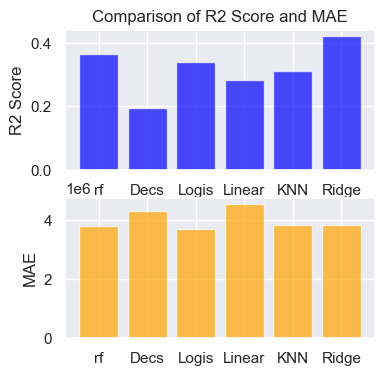

In [651]:
import matplotlib.pyplot as plt
def plot_comparison(indices=name_model, r2 = r2_scores, mean=mean_abs):
    # Vẽ đồ thị
    plt.figure(figsize=(4, 4))

    plt.subplot(2, 1, 1)
    plt.bar(indices, r2_scores, color='blue', alpha=0.7, label='R2 Score')
    plt.title('Comparison of R2 Score and MAE')
    plt.ylabel('R2 Score')
    plt.xticks(indices)

    # Đồ thị MAE values
    plt.subplot(2, 1, 2)
    plt.bar(indices, mean_abs, color='orange', alpha=0.7, label='MAE')
    plt.ylabel('MAE')
    plt.xticks(indices)
    
    plt.show
plot_comparison()

## Nhận xét kết quả các mô hình
### Mô hình Ridge có giá trị R2 Score cao nhất và MAE tương đối thấp so với những giá trị còn lại => Là mô hình tốt nhất trong 4 mô hình
- R2 score: Phép đo về độ fit của dữ liệu với mô hình đánh giá
- => Độ fit của dữ liệu với mô hình sẽ nằm trong khoảng từ 0 - 1; bằng 0: điểm dữ liệu không cắt đường hồi quy tại bất kì điểm nào; bằng 1: điểm dữ liệu nằm trên đường hồi quy
- => Giá trị càng tiến về một thì sẽ càng fit
- MAE(Mean Absolute Error): Sai số tuyệt đối trung bình (|y0-y_predict0| + |y1-y_predict1| + ...+ |yN-y_predictN|)/N  ( cùng đơn vị với giá laptop)
- => Là sai số giữa kết quả dự đoán ra so với giá trị y_test ban đầu
- => Giá trị càng nhỏ thì sai số càng thấp => mô hình càng tốt


# => Lựa chọn mô hình Ridge làm  mô hình dự đoán giá

# Tạo lựa chọn lựa chọn để dự đoán giá

In [652]:
df.head(5)

,company,typeName,cpu,processor,os,screen_size,ram,card,ssd/hdd,hard_driver,made_in,warranty,price
0,HP,Pavilion,Intel,Core i5,Windows,13.6,8.0,Onboard,1,256.0,VietNam,3,7900000
1,HP,Elitebook,Intel,Core i5,Windows,13.0,8.0,Onboard,1,256.0,US,3,4900000
2,Dell,Latitude,Intel,Core i5,Windows,13.0,8.0,NVIDIA,0,256.0,Unknown,1,5300000
3,Apple,MacBook Air M2,Intel,Core i5,macOS,13.0,16.0,Onboard,1,256.0,VietNam,6,27500000
4,Dell,Latitude,Intel,Core i7,Windows,12.5,8.0,Onboard,1,256.0,Unknown,3,5500000


### Tạo select và các option

In [653]:
# Khởi tạo widget Select
select_company = pn.widgets.Select(name='Company', options=list(df['company'].unique()), value='None')
select_cpu = pn.widgets.Select(name='cpu', options=list(df['cpu'].unique()), value='None')
select_processor = pn.widgets.Select(name='processor', options=list(df['processor'].unique()), value='None')
select_os = pn.widgets.Select(name='os', options=list(df['os'].unique()), value='None')
select_screen_size = pn.widgets.Select(name='screen_size', options=list(df['screen_size'].unique()), value='None')
select_ram = pn.widgets.Select(name='ram', options=list(df['ram'].unique()), value='None')
select_card = pn.widgets.Select(name='card', options=list(df['card'].unique()), value='None')
select_ssd_hdd = pn.widgets.Select(name='ssd/hdd', options=list(df['ssd/hdd'].unique()), value='None')
select_hard_driver = pn.widgets.Select(name='hard_driver', options=list(df['hard_driver'].unique()), value='None')
select_made_in = pn.widgets.Select(name='made_in', options=list(df['made_in'].unique()), value='None')
select_warranty = pn.widgets.Select(name='warranty', options=list(df['warranty'].unique()), value='None')

## kết nối tới các widget Select để cập nhật list khi lựa chon option khác

In [654]:
selected_values = [None] * 11

# Callback function để cập nhật giá trị khi người dùng chọn
def update_selected_values(event, index):
    selected_values[index] = event.new

# Kết nối callback với sự kiện 'value' của từng widget Select
select_company.param.watch(lambda event: update_selected_values(event, 0), 'value')
select_cpu.param.watch(lambda event: update_selected_values(event, 1), 'value')
select_processor.param.watch(lambda event: update_selected_values(event, 2), 'value')
select_os.param.watch(lambda event: update_selected_values(event, 3), 'value')
select_screen_size.param.watch(lambda event: update_selected_values(event, 4), 'value')
select_ram.param.watch(lambda event: update_selected_values(event, 5), 'value')
select_card.param.watch(lambda event: update_selected_values(event, 6), 'value')
select_ssd_hdd.param.watch(lambda event: update_selected_values(event, 7), 'value')
select_hard_driver.param.watch(lambda event: update_selected_values(event, 8), 'value')
select_made_in.param.watch(lambda event: update_selected_values(event, 9), 'value')
select_warranty.param.watch(lambda event: update_selected_values(event, 10), 'value')

# Hiển thị widgets
pn.Column(
    select_company, select_cpu, select_processor, select_os,
    select_screen_size, select_ram, select_card, select_ssd_hdd,
    select_hard_driver, select_made_in, select_warranty
)

Column
    [0] Select(name='Company', options=['HP', 'Dell', ...], value='HP')
    [1] Select(name='cpu', options=['Intel', 'AMD'], value='Intel')
    [2] Select(name='processor', options=['Core i5', 'Core i7', ...], value='Core i5')
    [3] Select(name='os', options=['Windows', 'macOS'], value='Windows')
    [4] Select(name='screen_size', options=[13.6, 13.0, 12.5, ...], value=13.6)
    [5] Select(name='ram', options=[8.0, 16.0, 32.0, ...], value=8.0)
    [6] Select(name='card', options=['Onboard', 'NVIDIA'], value='Onboard')
    [7] Select(name='ssd/hdd', options=[1, 0], value=1)
    [8] Select(name='hard_driver', options=[256.0, 512.0, ...], value=256.0)
    [9] Select(name='made_in', options=['VietNam', 'US', ...], value='VietNam')
    [10] Select(name='warranty', options=[3, 1, 6, 12, 0, 2], value=3)

### Lựa chọn các select mà mình muốn dự đoán chiếc laptop đó rồi chạy lại 2 dòng bên dưới

In [655]:
selected_values

['HP',
 'Intel',
 'Core i5',
 'Windows',
 13.6,
 8.0,
 'Onboard',
 1,
 256.0,
 'VietNam',
 3]

In [656]:
df_predict = pd.DataFrame([selected_values], columns=['company', 'cpu', 'processor', 'os', 'screen_size',
                                              'ram', 'card', 'ssd/hdd', 'hard_driver', 'made_in', 'warranty'])
deci_predict_laptop = preprocessor.transform(df_predict)
my_predict = ridge_reg.predict(deci_predict_laptop).tolist()
print("Giá chiếc laptop được dự đoán là: {} VND".format(my_predict[0]))

Giá chiếc laptop được dự đoán là: 6464815.429644775 VND


# Visualization Dashboard With Panel/Pvplot

In [657]:
df.head(2)

,company,typeName,cpu,processor,os,screen_size,ram,card,ssd/hdd,hard_driver,made_in,warranty,price
0,HP,Pavilion,Intel,Core i5,Windows,13.6,8.0,Onboard,1,256.0,VietNam,3,7900000
1,HP,Elitebook,Intel,Core i5,Windows,13.0,8.0,Onboard,1,256.0,US,3,4900000


In [658]:
features_select = df.drop(columns=["price", "typeName"]).columns.tolist()
features_select

['company',
 'cpu',
 'processor',
 'os',
 'screen_size',
 'ram',
 'card',
 'ssd/hdd',
 'hard_driver',
 'made_in',
 'warranty']

### Tạo select option

In [659]:
# define select options
x_axis = pn.widgets.Select(name="x_axis", options=features_select, value = 'brand')

In [660]:
df.dtypes

company         object
typeName        object
cpu             object
processor       object
os              object
screen_size    float64
ram            float64
card            object
ssd/hdd          int64
hard_driver    float64
made_in         object
warranty         int32
price            int64
dtype: object

### Hàm vẽ đồ thị scatter chart

In [661]:
# function create scatter chart
def create_scatter_chart(x_axis='company', y_axis='price'):
    scatter_fig = df.hvplot.scatter(x=x_axis, y=y_axis, by='company', rot = 45,
                  legend='top', height=480, width=480)
    return scatter_fig

### Hàm vẽ đồ thị boxplot

In [662]:
# function create box chart
def create_box_chart(x_axis='company', y_axis='price'):
    box_fig = df.hvplot.box(y=y_axis, by = x_axis,
                            legend='top',
                            rot = 45,
                            height=480, width=480)
    return box_fig


### Vẽ scatter với boxplot

In [663]:
row_1 = pn.Column(
                        pn.Row(x_axis),
                        pn.Row(create_scatter_chart(), create_box_chart())
                )
def update_row_1(event):
    row_1[1][0].object = create_scatter_chart(x_axis.value)
    row_1[1][1].object = create_box_chart(x_axis.value)
    row_1[2][0].object = create_bar_chart(x_axis.value)    

x_axis.param.watch(update_row_1, "value")

Watcher(inst=Select(name='x_axis', options=['company', 'cpu', ...], value='brand'), cls=<class 'panel.widgets.select.Select'>, fn=<function update_row_1 at 0x0000025ADB6E2170>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

### Hàm tạo heatmap

In [664]:
df_r2_score = pd.DataFrame({'name_model': name_model, 'r2':r2_scores})
df_MAE = pd.DataFrame({'name_model': name_model, 'MAE': mean_abs})

## DASHBOARD

C:\Users\khanhduy\AppData\Local\Temp\ipykernel_17836\2321946145.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig_1 = sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="YlGnBu", fmt=".2f", square=True, cbar_kws={"shrink": 0.7}, ax = axes[0,1])


NameError: name 'create_bar_chart' is not defined

Row
    [0] Column
        [0] Row
            [0] Select(name='x_axis', options=['company', 'cpu', ...], value='company')
        [1] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(BoxWhisker)

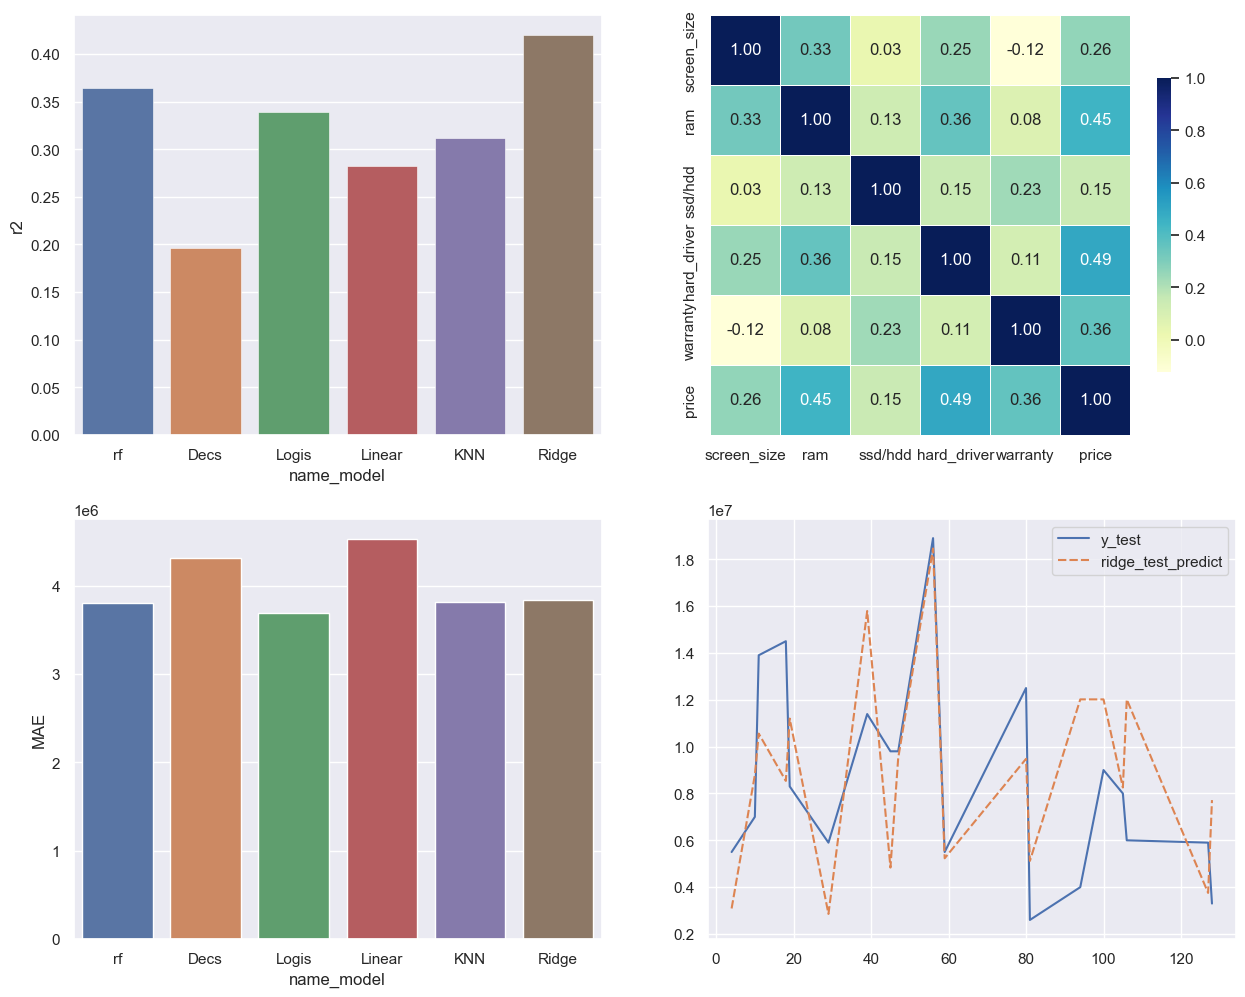

In [665]:
f, axes = plt.subplots(2,2,figsize=(15,12))
sns.set_style('darkgrid')

fig_1 = sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="YlGnBu", fmt=".2f", square=True, cbar_kws={"shrink": 0.7}, ax = axes[0,1])

fix_2 = sns.barplot(x='name_model', y = 'r2', data= df_r2_score, linewidth=0.4, ax=axes[0,0])

fix_3 = sns.barplot(x='name_model', y = 'MAE', data= df_MAE, ax=axes[1,0])

fig_4 = sns.lineplot(data=df_ridge, ax=axes[1, 1])
main_layout = pn.Row(
    row_1
)
main_layout